In [ ]:
#Email classifier machine learning model

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('emails.csv')

In [ ]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [ ]:
df.groupby('text').describe()

spam                     \
                                                   count mean std  min  25%   
text                                                                          
Subject:   http : / / www . virtu  ally - anywh...   1.0  1.0 NaN  1.0  1.0   
Subject: ! gorgeous , custom websites - $ 399 c...   1.0  1.0 NaN  1.0  1.0   
Subject: "  content - type : text / plain ; cha...   1.0  1.0 NaN  1.0  1.0   
Subject: " enron day " to be declared in spearm...   1.0  0.0 NaN  0.0  0.0   
Subject: " help millions " - pledge today !  th...   1.0  0.0 NaN  0.0  0.0   
...                                                  ...  ...  ..  ...  ...   
Subject: zimin ' s father  vince and stinson , ...   1.0  0.0 NaN  0.0  0.0   
Subject: zingales seminar  enron seminar series...   1.0  0.0 NaN  0.0  0.0   
Subject: zingales seminar  enron seminar series...   1.0  0.0 NaN  0.0  0.0   
Subject: zingales seminar  fyi !  - - - - - - -...   1.0  0.0 NaN  0.0  0.0   
Subject: zingales seminar  fyi !  - - - - - - -...   1.0  0.0 NaN  0.0  0.0   

                                                                   
                                                    50%  75%  max  
text                                                               
Subject:   http : / / www . virtu  ally - anywh...  1.0  1.0  1.0  
Subject: ! gorgeous , custom websites - $ 399 c...  1.0  1.0  1.0  
Subject: "  content - type : text / plain ; cha...  1.0  1.0  1.0  
Subject: " enron day " to be declared in spearm...  0.0  0.0  0.0  
Subject: " help millions " - pledge today !  th...  0.0  0.0  0.0  
...                                                 ...  ...  ...  
Subject: zimin ' s father  vince and stinson , ...  0.0  0.0  0.0  
Subject: zingales seminar  enron seminar series...  0.0  0.0  0.0  
Subject: zingales seminar  enron seminar series...  0.0  0.0  0.0  
Subject: zingales seminar  fyi !  - - - - - - -...  0.0  0.0  0.0  
Subject: zingales seminar  fyi !  - - - - - - -...  0.0  0.0  0.0  

[5695 rows x 8 columns]

In [ ]:
df.duplicated().sum()

33

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().any()

text    False
spam    False
dtype: bool

In [ ]:
import seaborn as sns

<Axes: xlabel='spam', ylabel='count'>

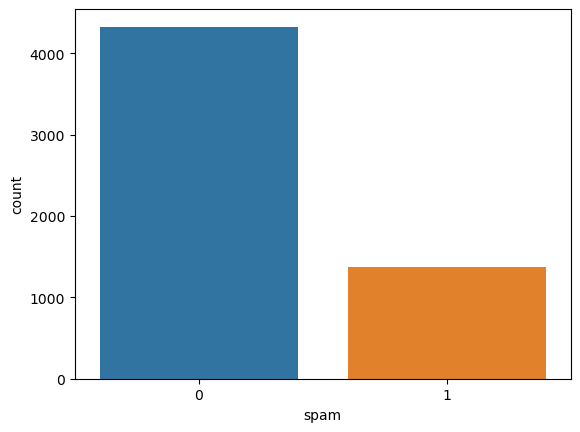

In [ ]:
sns.countplot(x='spam',data=df)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.text,df.spam)

In [ ]:
x_train.shape

(4271,)

In [ ]:
x_test.shape

(1424,)

In [ ]:
y_train.shape

(4271,)

In [ ]:
y_test.shape


(1424,)

In [ ]:
#Preprocessing

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv=CountVectorizer()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [ ]:
nb=MultinomialNB()

In [ ]:
pipe=make_pipeline(cv,nb)

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [ ]:
pipe.score(x_train,y_train)

0.9962538047295715

In [ ]:
email = ['Hey i am Elon Musk. Get a brand new car from Tesla']
pipe.predict(email)

array([1], dtype=int64)

In [ ]:
pipe.score(x_test,y_test)

0.9957865168539326

In [ ]:
import pickle
pickle.dump(pipe, open("Naive_model.pkl",'wb'))

In [ ]:
cv

CountVectorizer()